In [1]:
library(igraph)
library(neat)
library(utils)
library(reshape2)
library(ggplot2)
library(pheatmap)
library(viridis)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: viridisLite


In [2]:
d=read.delim(gzfile("GENIE3.top10_target_ranks.ranked_regulator_target_interactions.with_communities.tsv.gz"),sep="\t",stringsAsFactors=FALSE)
d=subset(d,community %in% as.character(as.roman(1:11)))
head(d)

,regulatoryGene,targetGene,weight,regulator_rank,target_rank,mutual_rank,regulator_community,target_community,community
1,Pp3c17_930.mRNA,Pp3s340_10.mRNA,0.067780515,1,1,1.000000,I,I,I
3,Pp3c2_25760.mRNA,Pp3s340_10.mRNA,0.015763051,58,3,13.190906,I,I,I
4,Pp3c19_10050.mRNA,Pp3s340_10.mRNA,0.009034066,496,7,58.923679,I,I,I
6,Pp3c2_36690.mRNA,Pp3s340_10.mRNA,0.009846669,50,6,17.320508,I,I,I
11,Pp3c17_930.mRNA,Pp3c19_7324.mRNA,0.047101805,2,1,1.414214,I,I,I
13,Pp3c2_25760.mRNA,Pp3c19_7324.mRNA,0.012256680,111,6,25.806976,I,I,I


In [3]:
n=read.delim("GENIE3.top10_target_ranks.communities_PLM.with_node_centralities.csv",sep=";",stringsAsFactors=FALSE)
n=subset(n,community %in% as.character(as.roman(1:11)))
head(n)

geneid,community,degree_centrality,betweenness_centrality,eigenvector_centrality,local_reaching_centrality,centrality_rank
Pp3c27_3080.mRNA,I,109,0,0.00000000,0.9977499,1
Pp3c11_23290.mRNA,I,552,3190,0.05359921,0.9971070,2
Pp3c7_2300.mRNA,I,505,7529,0.02518149,0.9971070,3
Pp3c17_23620.mRNA,I,490,1988,0.05419710,0.9971070,4
Pp3c16_13280.mRNA,I,485,9982,0.05634423,0.9971070,5
Pp3c15_11610.mRNA,I,461,3734,0.04049888,0.9971070,6


In [4]:
G=graph_from_data_frame(d,directed = TRUE,vertices = n)

In [5]:
head(degree(G,mode="out")["Pp3c27_3080.mRNA"])

Pp3c27_3080.mRNA 
             109

In [7]:
n$community=ordered(n$community,levels=as.character(as.roman(1:11)))
table(n$community)


   I   II  III   IV   IX    V   VI  VII VIII    X   XI 
3112 4418 1705 2728 6167 3435 1849 3851 3662 2403 2309 

In [ ]:
com=sapply(levels(n$community),function(i) n[n$community==i, "geneid"])

Notebook originally comprised multiple NEAT analyses and was split to increase readability and reproducibility.

In [10]:
load("../sleuth/DEGs.set_lists.qval0.01.RData")

In [11]:
genotype=grep("WT|deltaDEK|LG3|Loop|OE",names(sL))
factorial=sL[-genotype]
genotype=sL[genotype]
str(factorial)
str(genotype)

List of 34
 $ colony_size.normal_vs_enlarged.up                  : chr [1:1530] "Pp3c6_19501.mRNA" "Pp3c4_31690.mRNA" "Pp3c1_680.mRNA" "Pp3c18_12300.mRNA" ...
 $ colony_size.normal_vs_reduced.up                   : chr [1:575] "Pp3c24_13920.mRNA" "Pp3c24_5170.mRNA" "Pp3c24_6340.mRNA" "Pp3c24_8100.mRNA" ...
 $ development_of_phyllids.normal_vs_aberrant.up      : chr [1:478] "Pp3c24_13920.mRNA" "Pp3c24_5170.mRNA" "Pp3c24_12530.mRNA" "Pp3c24_5950.mRNA" ...
 $ development_of_phyllids.normal_vs_delayed.up       : chr [1:1047] "Pp3c17_17550.mRNA" "Pp3c24_2170.mRNA" "Pp3c5_28230.mRNA" "Pp3c15_970.mRNA" ...
 $ elongation_caulonema.early.normal_vs_elongated.up  : chr [1:462] "Pp3c21_6228.mRNA" "Pp3c2_29920.mRNA" "Pp3c18_12300.mRNA" "Pp3c13_15800.mRNA" ...
 $ elongation_caulonema.early.normal_vs_reduced.up    : chr [1:374] "Pp3c23_14490.mRNA" "Pp3c14_8127.mRNA" "Pp3c23_15650.mRNA" "Pp3c9_14530.mRNA" ...
 $ elongation_caulonema.late.normal_vs_elongated.up   : chr [1:1606] "Pp3c17_17550.mRNA" "Pp3

In [12]:
Fact=do.call(rbind,lapply(seq_len(length(names(factorial))),function(i){
    n=names(factorial)[i]
    N=gsub("\\.(up|down)$","",n,perl=TRUE)[1]
    data.frame(name=N,id=unique(factorial[[i]]))
}))
Fact=sapply(levels(Fact$name),function(n) {
    return(Fact[Fact$name==n,"id"])
})
sapply(Fact,length)

colony_size.normal_vs_enlarged 
                                          3568 
                 colony_size.normal_vs_reduced 
                                           759 
    development_of_phyllids.normal_vs_aberrant 
                                           761 
     development_of_phyllids.normal_vs_delayed 
                                          2660 
elongation_caulonema.early.normal_vs_elongated 
                                          1369 
  elongation_caulonema.early.normal_vs_reduced 
                                          1098 
 elongation_caulonema.late.normal_vs_elongated 
                                          3564 
   elongation_caulonema.late.normal_vs_reduced 
                                            93 
      gametophore_formation.normal_vs_aberrant 
                                           761 
      gametophore_formation.normal_vs_arrested 
                                           893 
       gametophore_formation.normal_vs_delayed 
                                          2660 
       number_buds_per_filament.normal_vs_high 
                                          1122 
   percents_filaments_with_buds.normal_vs_high 
                                           366 
    percents_filaments_with_buds.normal_vs_low 
                                            52 
      protonemata_branching.normal_vs_aberrant 
                                           716 
           rhizoid_formation.normal_vs_delayed 
                                          4308 
           rhizoid_formation.normal_vs_ectopic 
                                          1112

In [13]:
test.gt = neat(alist = genotype, blist = com, network = G, nettype = 'undirected', nodes = n$geneid, alpha = 0.05) 
test.ft = neat(alist = factorial, blist = com, network = G, nettype = 'undirected', nodes = n$geneid, alpha = 0.05) 
test.Ft = neat(alist = Fact, blist = com, network = G, nettype = 'undirected', nodes = n$geneid, alpha = 0.05) 

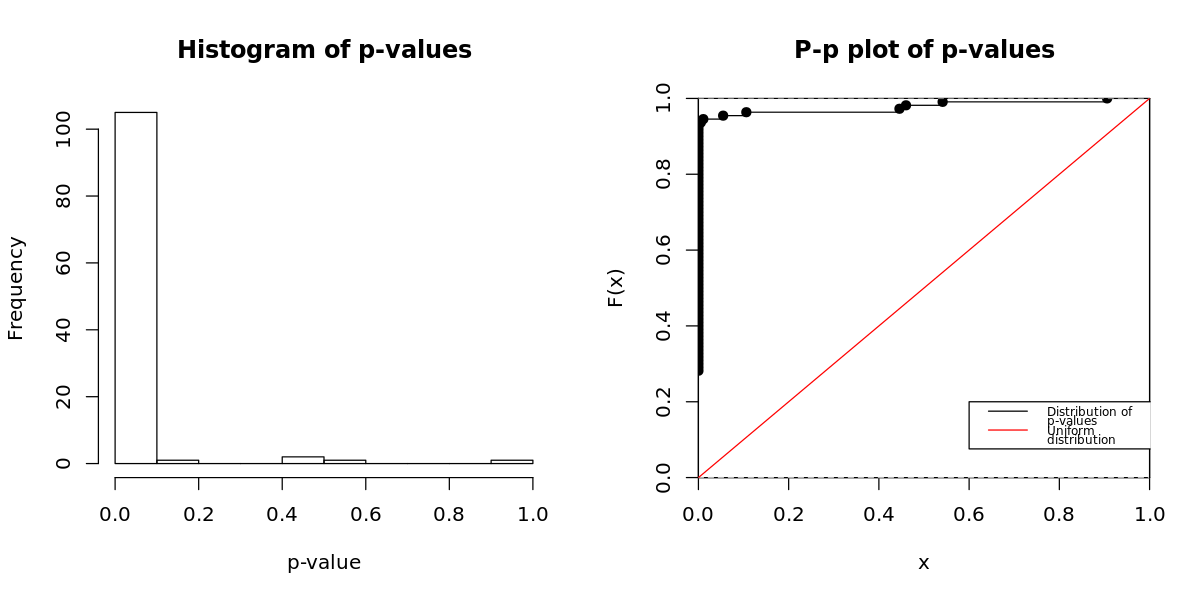

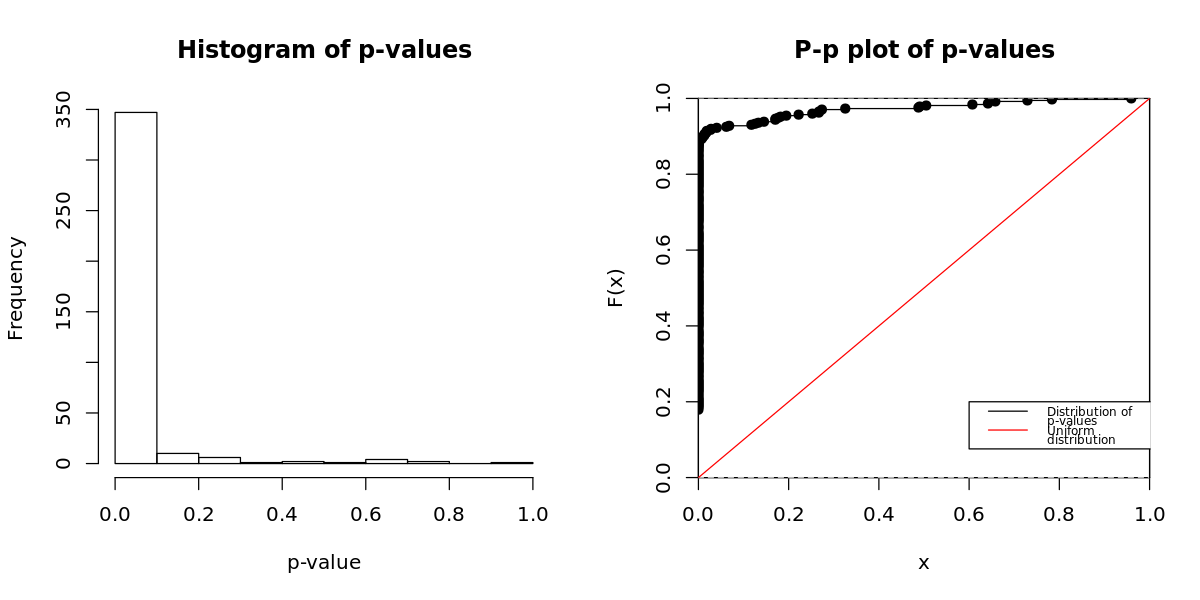

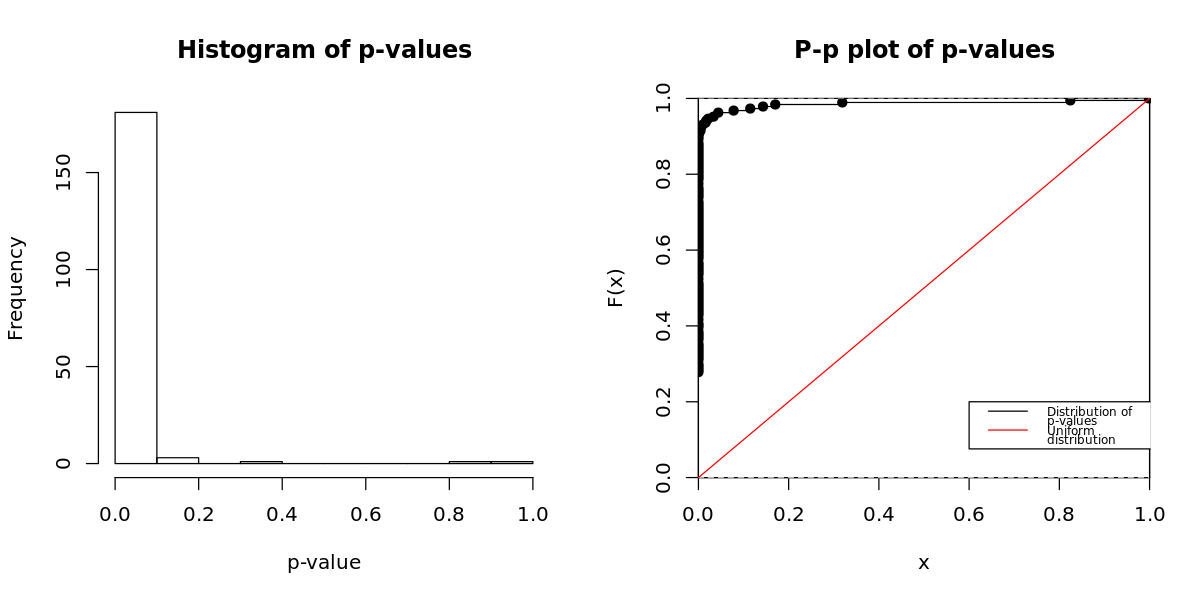

In [14]:
options(repr.plot.width=10, repr.plot.height=5)
plot(test.gt)
plot(test.ft)
plot(test.Ft)

In [15]:
test.gt$fdr=p.adjust(test.gt$pvalue,method="fdr")
test.gt$bonferroni=p.adjust(test.gt$pvalue,method="bonferroni")
table(test.gt$conclusion,test.gt$fdr<0.01,test.gt$bonferroni<0.01)

, ,  = FALSE

                 
                  FALSE TRUE
  No enrichment       6    0
  Overenrichment      1    1
  Underenrichment     0    1

, ,  = TRUE

                 
                  FALSE TRUE
  No enrichment       0    0
  Overenrichment      0   27
  Underenrichment     0   74


In [16]:
test.ft$fdr=p.adjust(test.ft$pvalue,method="fdr")
test.ft$bonferroni=p.adjust(test.ft$pvalue,method="bonferroni")
table(test.ft$conclusion,test.ft$fdr<0.01,test.ft$bonferroni<0.01)

, ,  = FALSE

                 
                  FALSE TRUE
  No enrichment      29    0
  Overenrichment      3    4
  Underenrichment     7    7

, ,  = TRUE

                 
                  FALSE TRUE
  No enrichment       0    0
  Overenrichment      0   80
  Underenrichment     0  244


In [17]:
test.Ft$fdr=p.adjust(test.Ft$pvalue,method="fdr")
test.Ft$bonferroni=p.adjust(test.Ft$pvalue,method="bonferroni")
table(test.Ft$conclusion,test.Ft$fdr<0.01,test.Ft$bonferroni<0.01)

, ,  = FALSE

                 
                  FALSE TRUE
  No enrichment       7    0
  Overenrichment      2    2
  Underenrichment     4    3

, ,  = TRUE

                 
                  FALSE TRUE
  No enrichment       0    0
  Overenrichment      0   45
  Underenrichment     0  124


In [18]:
Test.gt=subset(test.gt[order(-test.gt$nab),], conclusion=="Overenrichment" & fdr<0.01)
table(Test.gt$A,Test.gt$B)

                     
                      I II III IV IX V VI VII VIII X XI
  deltaDEK_vs_OE.down 0  0   0  0  1 0  0   0    1 1  0
  deltaDEK_vs_OE.up   0  0   0  0  1 1  0   1    0 0  0
  WT_vs_deltaDEK.down 0  1   0  0  0 1  0   1    0 0  0
  WT_vs_deltaDEK.up   0  1   0  0  0 0  0   0    0 1  0
  WT_vs_LG3.down      0  1   0  0  0 1  0   0    0 1  0
  WT_vs_LG3.up        0  1   0  0  1 0  0   0    1 0  0
  WT_vs_Loop.down     0  0   0  0  0 1  0   0    1 0  0
  WT_vs_Loop.up       0  1   0  0  0 0  0   0    0 0  1
  WT_vs_OE.down       0  1   0  0  0 0  0   1    0 1  0
  WT_vs_OE.up         0  1   0  0  0 1  0   1    1 0  0

In [19]:
Test.ft=subset(test.ft[order(-test.ft$nab),], conclusion=="Overenrichment" & fdr<0.01)
table(Test.ft$A,Test.ft$B)

                                                     
                                                      I II III IV IX V VI VII
  colony_size.normal_vs_enlarged.down                 0  1   0  0  0 0  0   0
  colony_size.normal_vs_enlarged.up                   0  1   0  0  0 1  0   0
  colony_size.normal_vs_reduced.down                  0  1   0  0  0 0  0   0
  colony_size.normal_vs_reduced.up                    0  1   0  0  1 0  1   0
  development_of_phyllids.normal_vs_aberrant.down     0  1   0  0  0 0  0   0
  development_of_phyllids.normal_vs_aberrant.up       0  1   0  0  1 0  1   0
  development_of_phyllids.normal_vs_delayed.down      0  1   0  0  0 0  0   0
  development_of_phyllids.normal_vs_delayed.up        0  1   0  0  0 1  0   0
  elongation_caulonema.early.normal_vs_elongated.down 0  1   0  0  0 0  0   0
  elongation_caulonema.early.normal_vs_elongated.up   0  1   0  0  1 0  0   0
  elongation_caulonema.early.normal_vs_reduced.down   0  0   0  0  1 1  0   0
  elongati

In [20]:
Test.Ft=subset(test.Ft[order(-test.Ft$nab),], conclusion=="Overenrichment" & fdr<0.01)
table(Test.Ft$A,Test.Ft$B)

                                                
                                                 I II III IV IX V VI VII VIII X
  colony_size.normal_vs_enlarged                 0  1   0  0  0 1  0   0    0 1
  colony_size.normal_vs_reduced                  0  1   0  0  1 0  1   0    0 0
  development_of_phyllids.normal_vs_aberrant     0  1   0  0  0 0  0   0    0 1
  development_of_phyllids.normal_vs_delayed      0  1   0  0  0 0  0   0    0 1
  elongation_caulonema.early.normal_vs_elongated 0  1   0  0  0 0  0   0    1 1
  elongation_caulonema.early.normal_vs_reduced   0  1   0  0  1 1  0   0    0 0
  elongation_caulonema.late.normal_vs_elongated  0  1   0  0  0 1  0   0    0 1
  elongation_caulonema.late.normal_vs_reduced    0  1   0  0  0 0  0   0    0 1
  gametophore_formation.normal_vs_aberrant       0  1   0  0  0 0  0   0    0 1
  gametophore_formation.normal_vs_arrested       0  1   0  0  0 1  0   0    0 1
  gametophore_formation.normal_vs_delayed        0  1   0  0  0 0  0   

In [27]:
col=read.delim("subnetwork_colours.csv",sep=",",stringsAsFactors=FALSE)
col2=as.character(col$colour)
names(col2)=col$network
col2

I        II       III        IV         V        VI       VII      VIII 
"#999999" "#FFE529" "#5A6A99" "#FF7F00" "#E486B7" "#6B886E" "#E41A1C" "#CA9A2C" 
       IX         X        XI 
"#AD5882" "#C66764" "#449B76"

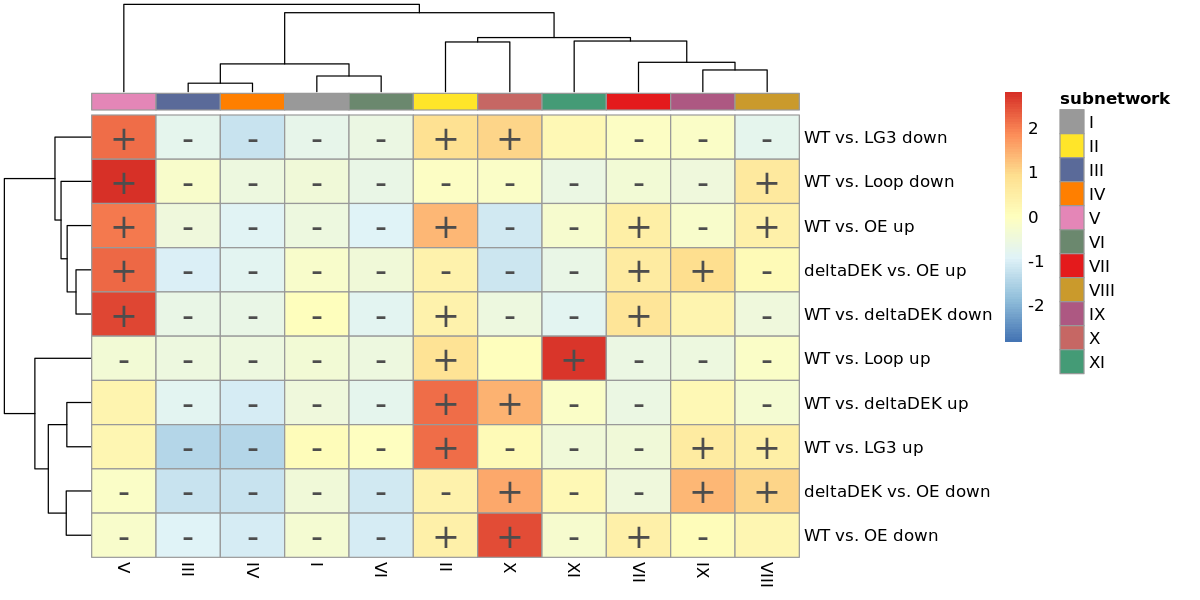

In [44]:
x=test.gt
x$var=x$nab/x$expected_nab
X=dcast(x,A~B,value.var="var")
row.names(X)=gsub("vs","vs.",gsub("\\."," ",gsub("_"," ",X[,1])))
X=X[,-1]
x$var2=ifelse(x$fdr<0.01,ifelse(x$conclusion=="Overenrichment","+","-"),"")
XX=dcast(x,A~B,value.var="var2")
row.names(XX)=gsub("vs","vs.",gsub("\\."," ",gsub("_"," ",XX[,1])))
XX=XX[,-1]
net=data.frame(subnetwork=as.character(col$network))
row.names(net)=col$network
options(repr.plot.width=10, repr.plot.height=5)
pheatmap(mat=X,scale="row",
         annotation_col=net,
         annotation_names_row = FALSE, annotation_names_col = FALSE,
         annotation_colors=list(subnetwork=col2),
         annotation_legend=TRUE,
         clustering_method="ward.D2",
         display_numbers=XX,
         fontsize_number=20
        )

In [46]:
write.table(test.gt,file="NEAT_subnetwork_enrichment.genotypes.tsv",sep="\t",row.names=FALSE,col.names=TRUE,quote=FALSE)

In [47]:
x=test.gt
x$var=x$nab/x$expected_nab
X=dcast(x,A~B,value.var="var")
row.names(X)=gsub("vs","vs.",gsub("\\."," ",gsub("_"," ",X[,1])))
X=X[,-1]
x$var2=ifelse(x$fdr<0.01,ifelse(x$conclusion=="Overenrichment","+","-"),"")
XX=dcast(x,A~B,value.var="var2")
row.names(XX)=gsub("vs","vs.",gsub("\\."," ",gsub("_"," ",XX[,1])))
XX=XX[,-1]
net=data.frame(subnetwork=as.character(col$network))
row.names(net)=col$network
pheatmap(mat=X,scale="row",
         annotation_col=net,
         annotation_names_row = FALSE, annotation_names_col = FALSE,
         annotation_colors=list(subnetwork=col2),
         annotation_legend=TRUE,
         clustering_method="ward.D2",
         display_numbers=XX,
         fontsize_number=13,
         width=10,
         height=5,
         filename="NEAT_subnetwork_enrichment.genotypes.pdf"
        )

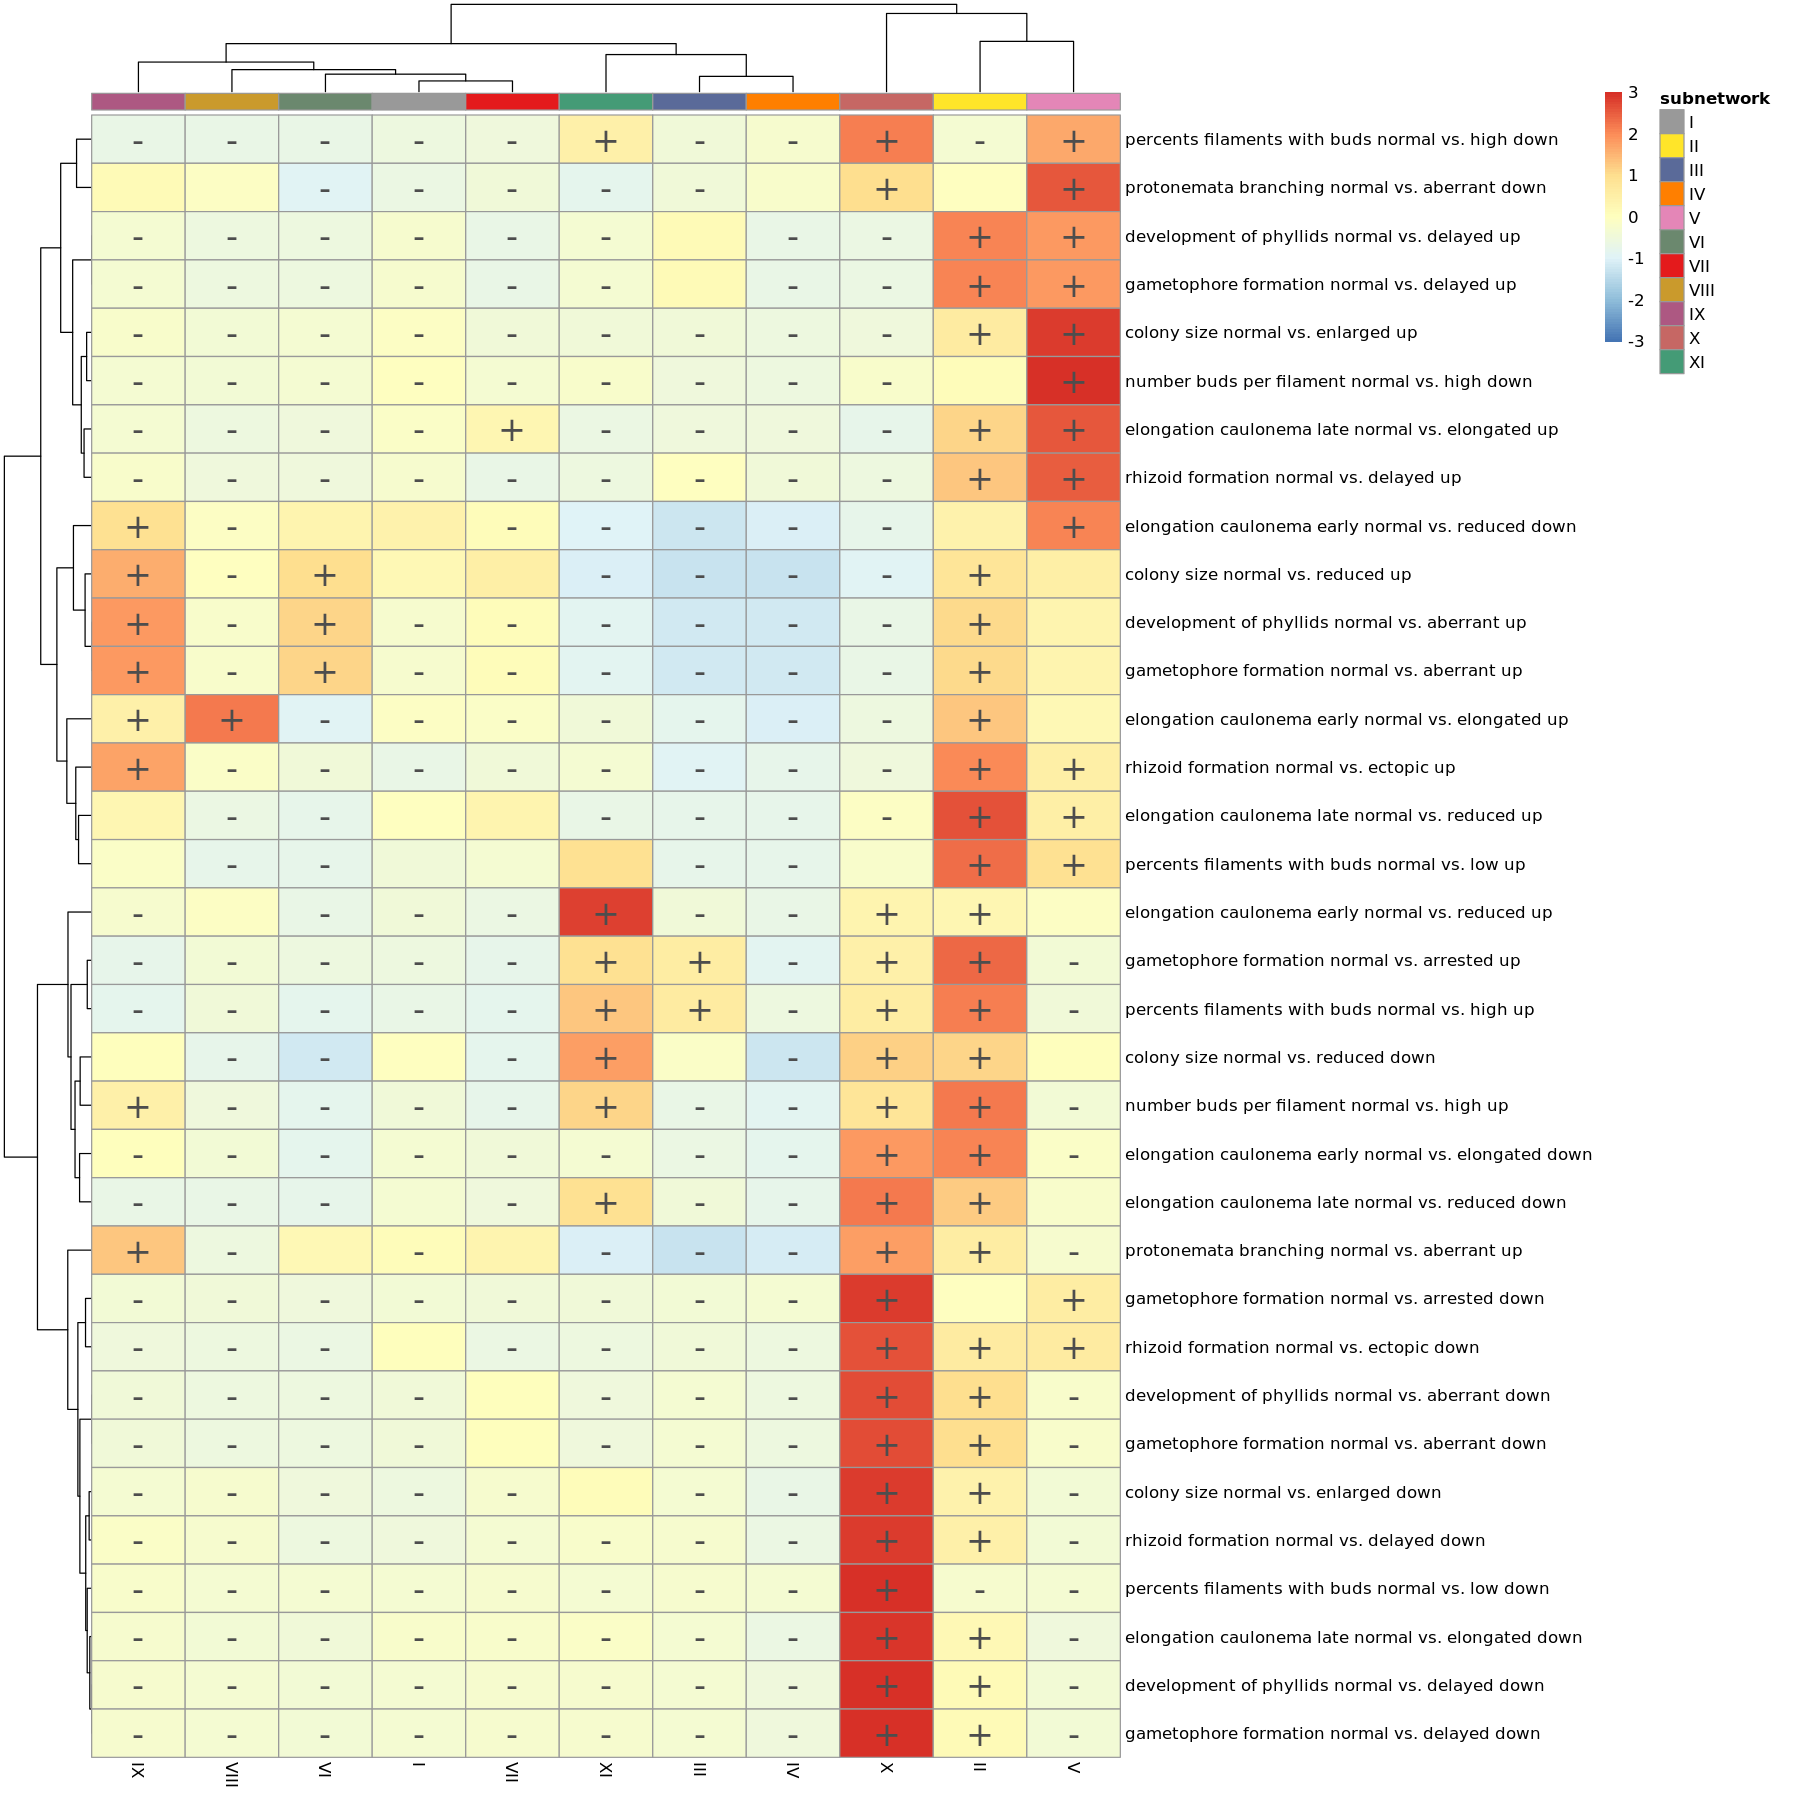

In [49]:
x=test.ft
x$var=x$nab/x$expected_nab
X=dcast(x,A~B,value.var="var")
row.names(X)=gsub("vs","vs.",gsub("\\."," ",gsub("_"," ",X[,1])))
X=X[,-1]
x$var2=ifelse(x$fdr<0.01,ifelse(x$conclusion=="Overenrichment","+","-"),"")
XX=dcast(x,A~B,value.var="var2")
row.names(XX)=gsub("vs","vs.",gsub("\\."," ",gsub("_"," ",XX[,1])))
XX=XX[,-1]
net=data.frame(subnetwork=as.character(col$network))
row.names(net)=col$network
options(repr.plot.width=15, repr.plot.height=15)

pheatmap(mat=X,scale="row",
         annotation_col=net,
         annotation_names_row = FALSE, annotation_names_col = FALSE,
         annotation_colors=list(subnetwork=col2),
         annotation_legend=TRUE,
         clustering_method="ward.D2",
         display_numbers=XX,
         fontsize_number=20
        )

In [51]:
write.table(test.ft,file="NEAT_subnetwork_enrichment.phenotypic_factors.tsv",sep="\t",row.names=FALSE,col.names=TRUE,quote=FALSE)

In [52]:
x=test.ft
x$var=x$nab/x$expected_nab
X=dcast(x,A~B,value.var="var")
row.names(X)=gsub("vs","vs.",gsub("\\."," ",gsub("_"," ",X[,1])))
X=X[,-1]
x$var2=ifelse(x$fdr<0.01,ifelse(x$conclusion=="Overenrichment","+","-"),"")
XX=dcast(x,A~B,value.var="var2")
row.names(XX)=gsub("vs","vs.",gsub("\\."," ",gsub("_"," ",XX[,1])))
XX=XX[,-1]
net=data.frame(subnetwork=as.character(col$network))
row.names(net)=col$network
pheatmap(mat=X,scale="row",
         annotation_col=net,
         annotation_names_row = FALSE, annotation_names_col = FALSE,
         annotation_colors=list(subnetwork=col2),
         annotation_legend=TRUE,
         clustering_method="ward.D2",
         display_numbers=XX,
         fontsize_number=10,
         width=10,
         height=10,
         filename="NEAT_subnetwork_enrichment.phenotypic_factors.pdf"
        )

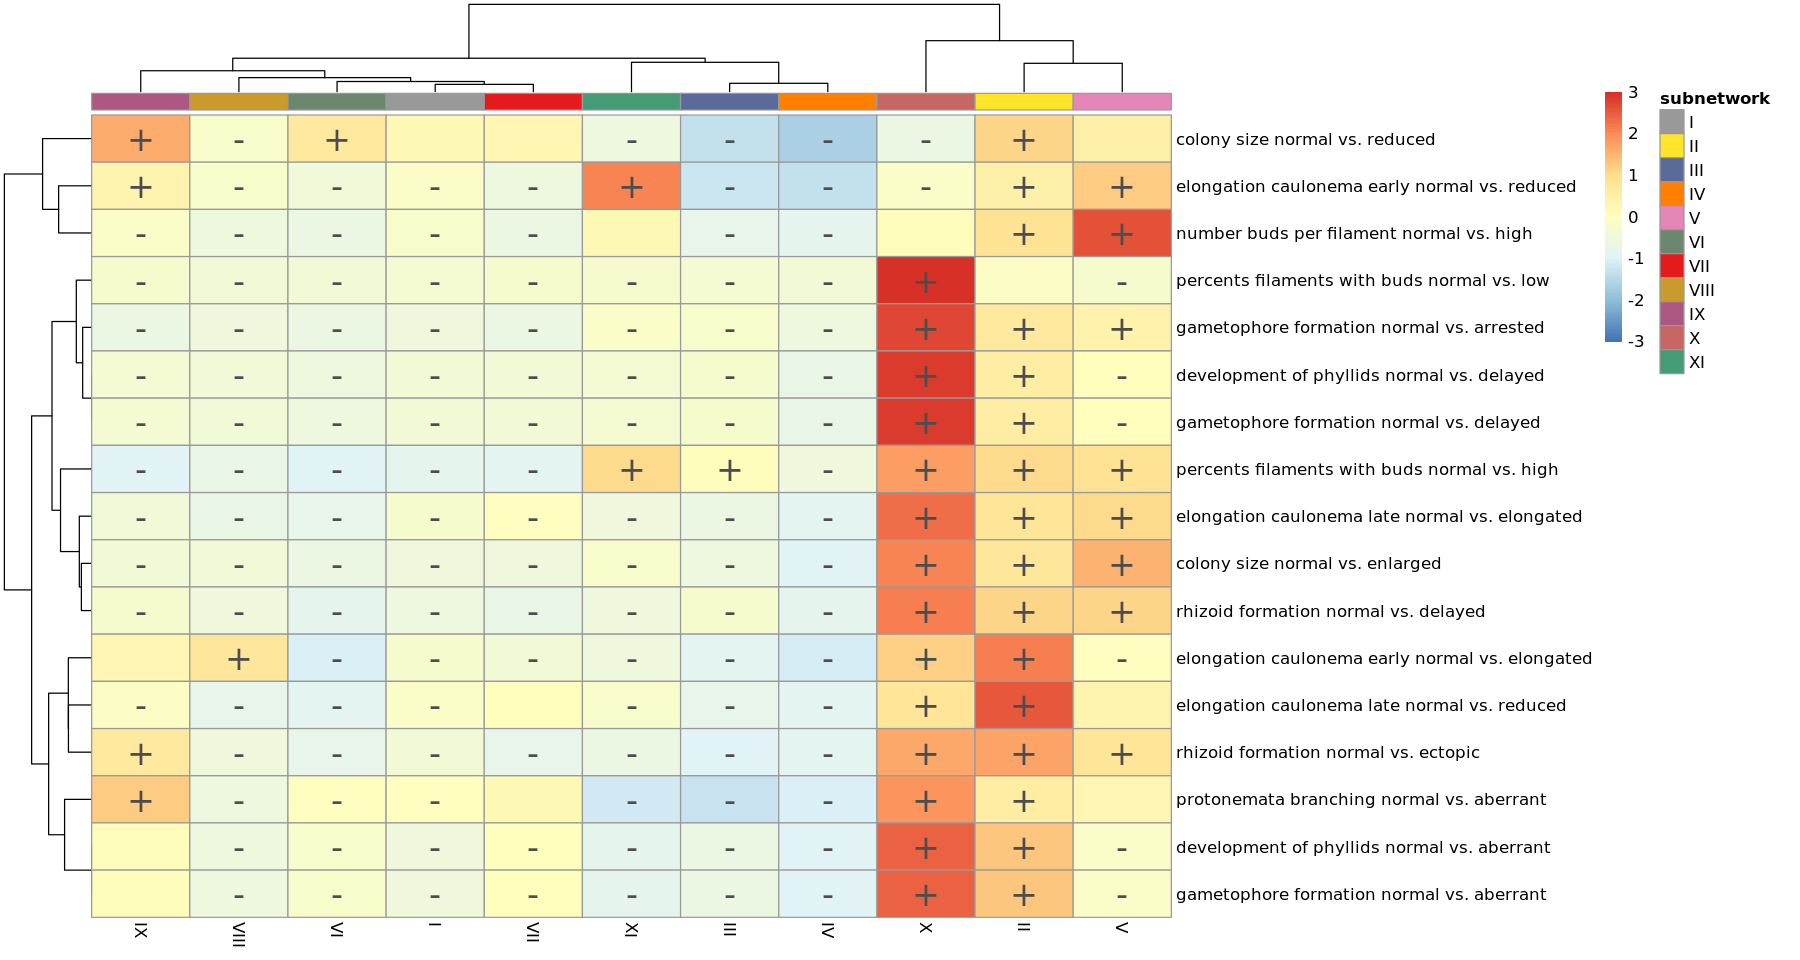

In [54]:
x=test.Ft
x$var=x$nab/x$expected_nab
X=dcast(x,A~B,value.var="var")
row.names(X)=gsub("vs","vs.",gsub("\\."," ",gsub("_"," ",X[,1])))
X=X[,-1]
x$var2=ifelse(x$fdr<0.01,ifelse(x$conclusion=="Overenrichment","+","-"),"")
XX=dcast(x,A~B,value.var="var2")
row.names(XX)=gsub("vs","vs.",gsub("\\."," ",gsub("_"," ",XX[,1])))
XX=XX[,-1]
net=data.frame(subnetwork=as.character(col$network))
row.names(net)=col$network
options(repr.plot.width=15, repr.plot.height=8)

pheatmap(mat=X,scale="row",
         annotation_col=net,
         annotation_names_row = FALSE, annotation_names_col = FALSE,
         annotation_colors=list(subnetwork=col2),
         annotation_legend=TRUE,
         clustering_method="ward.D2",
         display_numbers=XX,
         fontsize_number=20
        )

In [56]:
write.table(test.Ft,file="NEAT_subnetwork_enrichment.phenotypic_factors.simplified.tsv",sep="\t",row.names=FALSE,col.names=TRUE,quote=FALSE)

In [57]:
x=test.Ft
x$var=x$nab/x$expected_nab
X=dcast(x,A~B,value.var="var")
row.names(X)=gsub("vs","vs.",gsub("\\."," ",gsub("_"," ",X[,1])))
X=X[,-1]
x$var2=ifelse(x$fdr<0.01,ifelse(x$conclusion=="Overenrichment","+","-"),"")
XX=dcast(x,A~B,value.var="var2")
row.names(XX)=gsub("vs","vs.",gsub("\\."," ",gsub("_"," ",XX[,1])))
XX=XX[,-1]
net=data.frame(subnetwork=as.character(col$network))
row.names(net)=col$network
pheatmap(mat=X,scale="row",
         annotation_col=net,
         annotation_names_row = FALSE, annotation_names_col = FALSE,
         annotation_colors=list(subnetwork=col2),
         annotation_legend=TRUE,
         clustering_method="ward.D2",
         display_numbers=XX,
         fontsize_number=10,
         width=10,
         height=8,
         filename="NEAT_subnetwork_enrichment.phenotypic_factors.simplified.pdf"
        )

In [59]:
path="../ontology_enrichment/input/profiles_sets/"
profiles=sapply(gsub("\\.set","",list.files(path=path,pattern="*.set")),function(n) {
    f=paste(path,paste(n,"set",sep="."),sep="/")
    read.table(f,sep="\t",header=FALSE,stringsAsFactors=FALSE)[,1]
})
str(profiles)

List of 2
 $ downDEK1_upOEX: chr [1:2639] "Pp3c1_10200.mRNA" "Pp3c1_10220.mRNA" "Pp3c1_11030.mRNA" "Pp3c1_11190.mRNA" ...
 $ upDEK1_downOEX: chr [1:2445] "Pp3c1_10400.mRNA" "Pp3c1_10760.mRNA" "Pp3c1_10830.mRNA" "Pp3c1_12715.mRNA" ...


In [60]:
test.pr = neat(alist = profiles, blist = com, network = G, nettype = 'undirected', nodes = n$geneid, alpha = 0.05) 

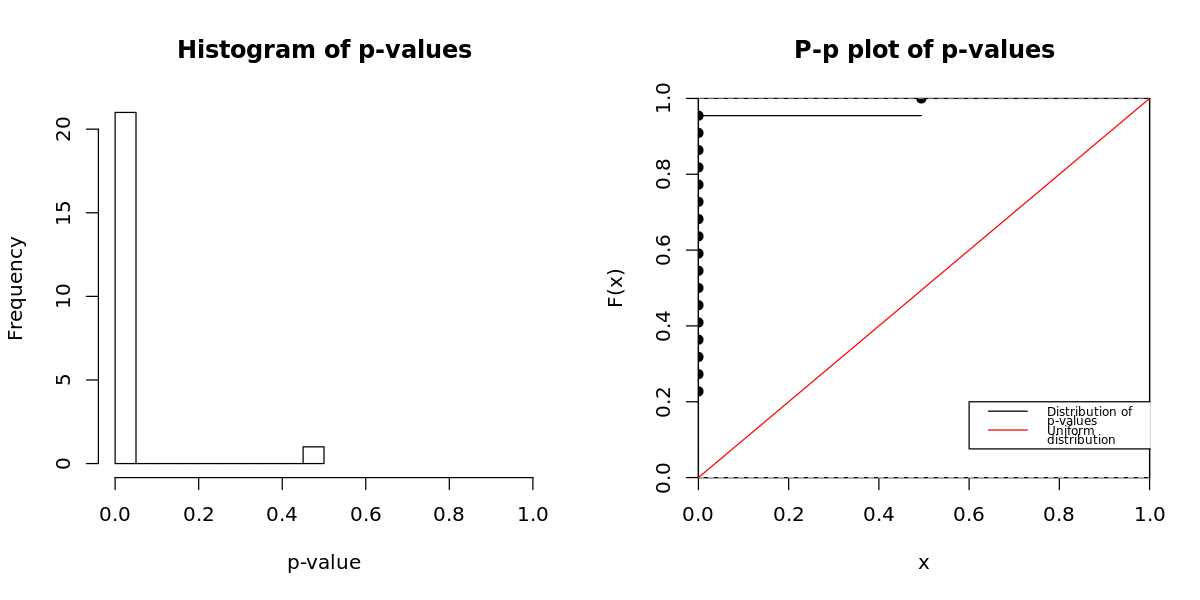

In [61]:
options(repr.plot.width=10, repr.plot.height=5)
plot(test.pr)

In [62]:
test.pr$fdr=p.adjust(test.pr$pvalue,method="fdr")
test.pr$bonferroni=p.adjust(test.pr$pvalue,method="bonferroni")
table(test.pr$conclusion,test.pr$fdr<0.01,test.pr$bonferroni<0.01)

, ,  = FALSE

                 
                  FALSE TRUE
  No enrichment       1    0
  Overenrichment      0    0
  Underenrichment     0    0

, ,  = TRUE

                 
                  FALSE TRUE
  No enrichment       0    0
  Overenrichment      0    6
  Underenrichment     0   15


In [63]:
Test.pr=subset(test.pr[order(-test.pr$nab),], conclusion=="Overenrichment" & fdr<0.01)
table(Test.pr$A,Test.pr$B)

                
                 I II III IV IX V VI VII VIII X XI
  downDEK1_upOEX 0  0   0  0  1 1  0   0    0 0  0
  upDEK1_downOEX 0  1   0  0  1 0  0   0    1 1  0

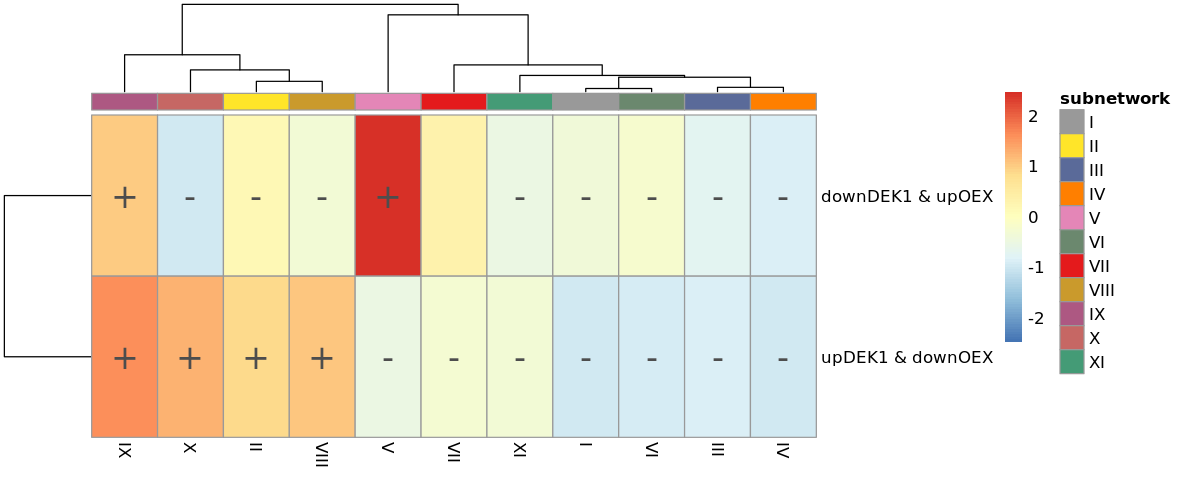

In [64]:
x=test.pr
x$var=x$nab/x$expected_nab
X=dcast(x,A~B,value.var="var")
row.names(X)=gsub("_"," & ",X[,1])
X=X[,-1]
x$var2=ifelse(x$fdr<0.01,ifelse(x$conclusion=="Overenrichment","+","-"),"")
XX=dcast(x,A~B,value.var="var2")
row.names(XX)=gsub("_"," & ",XX[,1])
XX=XX[,-1]
net=data.frame(subnetwork=as.character(col$network))
row.names(net)=col$network
options(repr.plot.width=10, repr.plot.height=4)

pheatmap(mat=X,scale="row",
         annotation_col=net,
         annotation_names_row = FALSE, annotation_names_col = FALSE,
         annotation_colors=list(subnetwork=col2),
         annotation_legend=TRUE,
         clustering_method="ward.D2",
         display_numbers=XX,
         fontsize_number=20
        )

In [66]:
write.table(test.pr,file="NEAT_subnetwork_enrichment.profiles.tsv",sep="\t",row.names=FALSE,col.names=TRUE,quote=FALSE)

In [67]:
x=test.pr
x$var=x$nab/x$expected_nab
X=dcast(x,A~B,value.var="var")
row.names(X)=gsub("_"," & ",X[,1])
X=X[,-1]
x$var2=ifelse(x$fdr<0.01,ifelse(x$conclusion=="Overenrichment","+","-"),"")
XX=dcast(x,A~B,value.var="var2")
row.names(XX)=gsub("_"," & ",XX[,1])
XX=XX[,-1]
net=data.frame(subnetwork=as.character(col$network))
row.names(net)=col$network
pheatmap(mat=X,scale="row",
         annotation_col=net,
         annotation_names_row = FALSE, annotation_names_col = FALSE,
         annotation_colors=list(subnetwork=col2),
         annotation_legend=TRUE,
         clustering_method="ward.D2",
         display_numbers=XX,
         fontsize_number=20,
         width=10,
         height=4,
         filename="NEAT_subnetwork_enrichment.profiles.pdf"
        )

In [69]:
path="../profiles/"
phases=do.call(rbind,lapply(gsub("profile_(\\d+)\\.set$","\\1",list.files(path=path,pattern="*.set")), function(n) {
    f=paste(path,sprintf("profile_%s.set",n),sep="/")
    q=read.delim(f,sep="\t",stringsAsFactors=FALSE)
    q$expr=gsub("uniform_WT_OEX/late_DEK","uniform",q$expr)
    data.frame(profile=n,q)
}))
phases=transform(phases,profile=factor(phases$profile),cluster=factor(phases$cluster),expr=factor(phases$expr))
head(phases)
table(phases$profile,phases$expr)
table(phases$profile,phases$cluster)

profile,id,cluster,expr
1,Pp3c1_10200.mRNA,1,late
1,Pp3c1_10220.mRNA,1,late
1,Pp3c1_11030.mRNA,2,early
1,Pp3c1_11190.mRNA,2,early
1,Pp3c1_11820.mRNA,3,uniform
1,Pp3c1_11980.mRNA,3,uniform


   
    early late uniform
  1   958  943     738
  2   667 1019     759

   
       1    2    3
  1  943  958  738
  2  667 1019  759

In [70]:
q=expand.grid(levels(phases$profile),levels(phases$expr))
ph=lapply(seq_len(nrow(q)),function(i) {
    phases[phases$profile==q[i,1] & phases$expr==q[i,2],"id"]
})
names(ph)=sprintf("profile%i_%s",q[,1],q[,2])
str(ph)

List of 6
 $ profile1_early  : chr [1:958] "Pp3c1_11030.mRNA" "Pp3c1_11190.mRNA" "Pp3c1_120.mRNA" "Pp3c1_12120.mRNA" ...
 $ profile2_early  : chr [1:667] "Pp3c1_10830.mRNA" "Pp3c1_12950.mRNA" "Pp3c1_15460.mRNA" "Pp3c1_15490.mRNA" ...
 $ profile1_late   : chr [1:943] "Pp3c1_10200.mRNA" "Pp3c1_10220.mRNA" "Pp3c1_12070.mRNA" "Pp3c1_12740.mRNA" ...
 $ profile2_late   : chr [1:1019] "Pp3c1_10760.mRNA" "Pp3c1_12715.mRNA" "Pp3c1_13200.mRNA" "Pp3c1_13780.mRNA" ...
 $ profile1_uniform: chr [1:738] "Pp3c1_11820.mRNA" "Pp3c1_11980.mRNA" "Pp3c1_13270.mRNA" "Pp3c1_1360.mRNA" ...
 $ profile2_uniform: chr [1:759] "Pp3c1_10400.mRNA" "Pp3c1_15740.mRNA" "Pp3c1_16840.mRNA" "Pp3c1_19831.mRNA" ...


In [71]:
test.ph = neat(alist = ph, blist = com, network = G, nettype = 'undirected', nodes = n$geneid, alpha = 0.05) 

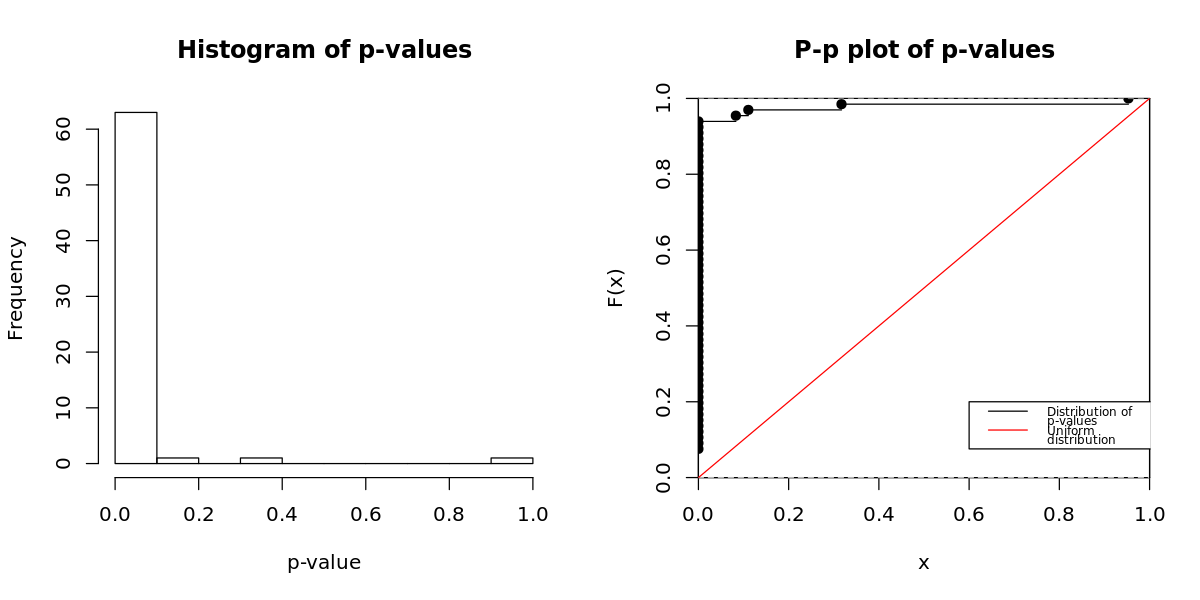

In [72]:
options(repr.plot.width=10, repr.plot.height=5)
plot(test.ph)

In [73]:
test.ph$fdr=p.adjust(test.ph$pvalue,method="fdr")
test.ph$bonferroni=p.adjust(test.ph$pvalue,method="bonferroni")
table(test.ph$conclusion,test.ph$fdr<0.01,test.ph$bonferroni<0.01)

, ,  = FALSE

                 
                  FALSE TRUE
  No enrichment       4    0
  Overenrichment      0    0
  Underenrichment     0    0

, ,  = TRUE

                 
                  FALSE TRUE
  No enrichment       0    0
  Overenrichment      0   15
  Underenrichment     0   47


In [74]:
Test.ph=subset(test.ph[order(-test.ph$nab),], conclusion=="Overenrichment" & fdr<0.01)
table(Test.ph$A,Test.ph$B)

                  
                   I II III IV IX V VI VII VIII X XI
  profile1_early   0  0   0  0  1 1  1   0    0 0  0
  profile1_late    0  1   0  0  1 0  0   0    0 0  0
  profile1_uniform 0  0   0  0  0 1  0   1    0 0  0
  profile2_early   0  0   0  0  1 1  0   0    1 0  0
  profile2_late    0  1   0  0  1 0  0   0    0 1  0
  profile2_uniform 0  1   0  0  1 0  0   0    0 0  0

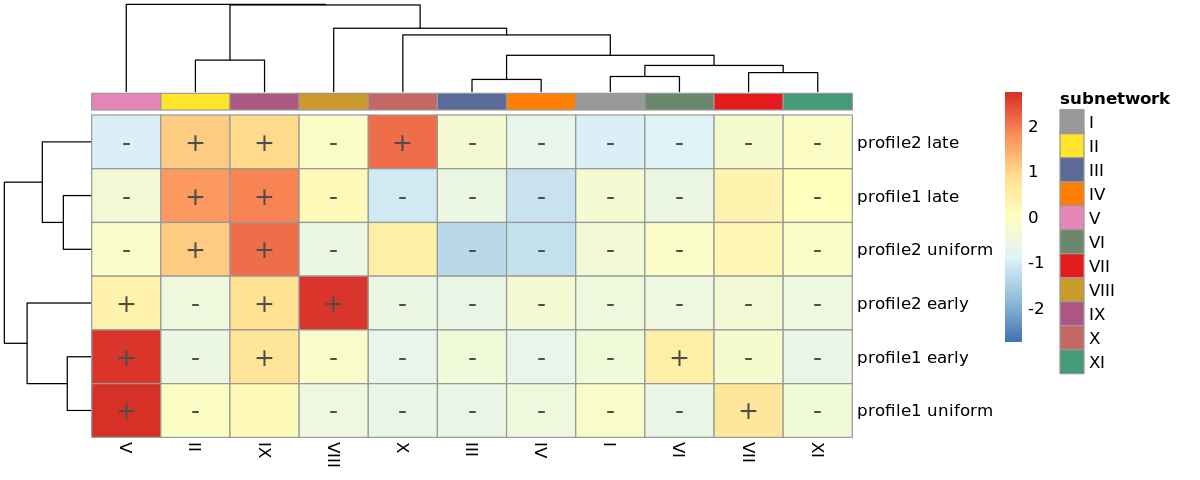

In [75]:
x=test.ph
x$var=x$nab/x$expected_nab
X=dcast(x,A~B,value.var="var")
row.names(X)=gsub("_"," ",X[,1])
X=X[,-1]
x$var2=ifelse(x$fdr<0.01,ifelse(x$conclusion=="Overenrichment","+","-"),"")
XX=dcast(x,A~B,value.var="var2")
row.names(XX)=gsub("_"," & ",XX[,1])
XX=XX[,-1]
net=data.frame(subnetwork=as.character(col$network))
row.names(net)=col$network
options(repr.plot.width=10, repr.plot.height=4)

pheatmap(mat=X,scale="row",
         annotation_col=net,
         annotation_names_row = FALSE, annotation_names_col = FALSE,
         annotation_colors=list(subnetwork=col2),
         annotation_legend=TRUE,
         clustering_method="ward.D2",
         display_numbers=XX,
         fontsize_number=15
        )

In [77]:
write.table(test.ph,file="NEAT_subnetwork_enrichment.profile_phases.tsv",sep="\t",row.names=FALSE,col.names=TRUE,quote=FALSE)

In [78]:
x=test.ph
x$var=x$nab/x$expected_nab
X=dcast(x,A~B,value.var="var")
row.names(X)=gsub("_"," ",X[,1])
X=X[,-1]
x$var2=ifelse(x$fdr<0.01,ifelse(x$conclusion=="Overenrichment","+","-"),"")
XX=dcast(x,A~B,value.var="var2")
row.names(XX)=gsub("_"," & ",XX[,1])
XX=XX[,-1]
net=data.frame(subnetwork=as.character(col$network))
row.names(net)=col$network
pheatmap(mat=X,scale="row",
         annotation_col=net,
         annotation_names_row = FALSE, annotation_names_col = FALSE,
         annotation_colors=list(subnetwork=col2),
         annotation_legend=TRUE,
         clustering_method="ward.D2",
         display_numbers=XX,
         fontsize_number=20,
         width=10,
         height=4,
         filename="NEAT_subnetwork_enrichment.profile_phases.pdf"
        )

In [80]:
phases$phase=sprintf("profile%i_%s",phases[,1],phases[,4])
head(phases)
write.table(phases,file="profile_phases.tsv",sep="\t",row.names=FALSE,col.names=TRUE,quote=FALSE)

profile,id,cluster,expr,phase
1,Pp3c1_10200.mRNA,1,late,profile1_late
1,Pp3c1_10220.mRNA,1,late,profile1_late
1,Pp3c1_11030.mRNA,2,early,profile1_early
1,Pp3c1_11190.mRNA,2,early,profile1_early
1,Pp3c1_11820.mRNA,3,uniform,profile1_uniform
1,Pp3c1_11980.mRNA,3,uniform,profile1_uniform
